In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

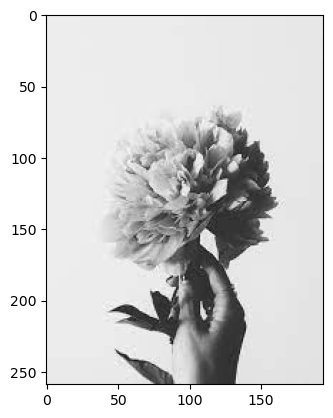

In [2]:
strImg = "entrada/img1.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

### Problema 1
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [3]:
def gris3d (img):
# Descripcion: Esta funcion genera una grafica de la imagen en escala de grises, tal que la coordenada z es la intensidad de gris
# Entradas: matriz de vectores que representa la imagen
# Salida: grafica 3d, tal que el color gris es el eje z
    alto=img.shape[0]
    ancho=img.shape[1]
    #valores que abarca en coordenadas de termino x - termino y
    x = np.arange(0, ancho)
    y= np.arange(0, alto)
    #repetir valores, el vector x cuantas y aparece/ vector y cuantas x aparece (forma coordenadas)
    x2,y2 = np.meshgrid(x, y)
    # z guarda intensidad de gris
    z= img

    grafica = plt.figure()
    modelo3d = grafica.add_subplot(111, projection='3d')
    modelo3d.plot_surface(x2, y2, z, cmap='gray')
    plt.show()

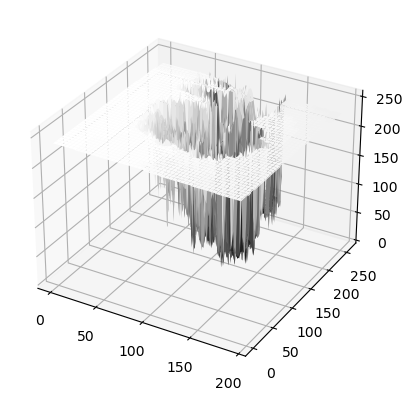

In [4]:
gris3d(img)

### Problema 2
Implemente una funcion para cada una de las transformaciones vistas en clase: negativa, lineal, logaritmica y exponencial

In [5]:
def negativa(img):
# Descripcion: Esta funcion aplica transformacion negativa a la imagen ingresada
# Entradas: matriz de vectores que representa la imagen
# Salida: transformacion negativa de la imagen que resulta de operar 255-valores de imagen

    negativoimg= 255 - img
    return negativoimg

def lineal(img, a, b):
# Descripcion: Esta funcion aplica transformacion lineal a la imagen ingresada
# Entradas: matriz de vectores que representa la imagen y parametros que modifican la intensidad 
# Salida: transformacion lineal de la imagen que resulta de operarla con los parametros especificados

    linealimg= a* img + b
    # forzar a que este en el rango 0 a 255 y que esos valores sean enteros al aplicar uint8
    linealimg = np.uint8(np.clip(linealimg, 0, 255))
    return linealimg

def logaritmica(img, c):
# Descripcion: Esta funcion aplica transformacion logaritmica a la imagen ingresada
# Entradas: matriz de vectores que representa la imagen y constante
# Salida: transformacion logaritmica de la imagen que resulta de operarla con la constante especificada
    
    logimg= c * np.log(img+1)
    # forzar a que este en el rango 0 a 255 y que esos valores sean enteros al aplicar uint8
    logimg= np.uint8(np.clip(logimg, 0, 255))
    return logimg

def exponencial(img, a):
# Descripcion: Esta funcion aplica transformacion exponencial a la imagen ingresada
# Entradas: matriz de vectores que representa la imagen y parametro que modifican la intensidad 
# Salida: transformacion exponencial de la imagen que resulta de operarla con el parametro especificado

    expimg= np.power(a, img)
    # forzar a que este en el rango 0 a 255 y que esos valores sean enteros al aplicar uint8
    expimg = np.uint8(np.clip(expimg, 0, 255))
    return expimg


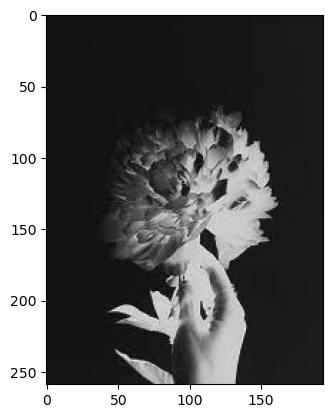

In [6]:
negimg=negativa(img)
cv2.imwrite("problema2Resultado/negativo.png", negimg)
plt.imshow(negimg, cmap='gray')

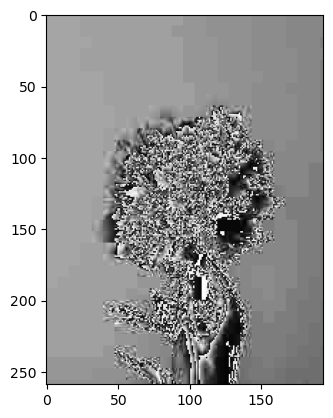

In [7]:
limg=lineal(img,5,4)
cv2.imwrite("problema2Resultado/lineal.png", limg)
plt.imshow(limg, cmap='gray')

C:\Users\50259\AppData\Local\Temp\ipykernel_15608\3716364611.py:24: RuntimeWarning: divide by zero encountered in log
  logimg= c * np.log(img+1)


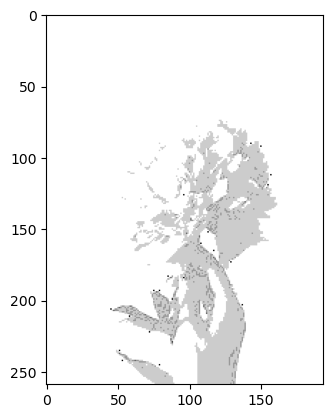

In [8]:
logimg=logaritmica(img,1.03)
cv2.imwrite("problema2Resultado/logaritmo.png", logimg)
plt.imshow(logimg, cmap='gray')

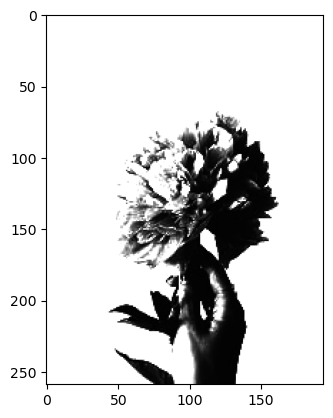

In [9]:
expimg=exponencial(img,1.03)
cv2.imwrite("problema2Resultado/exponente.png", expimg)
plt.imshow(expimg, cmap='gray')

### Problema 3
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR, XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [10]:

def operaciones(strimg1, strimg2):

# Descripcion: Esta funcion aplica opercaciones: SUMA, RESTA, AND, OR, XOR con dos imagenes
# Entradas: string con el nombre o la direccion (a nivel de carpeta) en donde se encuentran las imagenes
# Salida: imagenes con las operaciones aplicadas

    # se lee imagen en escala de grises
    img1gris= cv2.imread(strimg1, cv2.IMREAD_GRAYSCALE)
    img2gris =  cv2.imread(strimg2, cv2.IMREAD_GRAYSCALE)
    
    #para que funcione las operaciones entre matrices deben ser del mismo tamaño por lo que se coloca el minimo de altura y ancho
    #se reajusta a esos valores minimo
    minAlto= min(img1gris.shape[0], img2gris.shape[0])
    minAncho= min(img1gris.shape[1], img2gris.shape[1])
    img1 = cv2.resize(img1gris, (minAncho, minAlto))
    img2= cv2.resize(img2gris, (minAncho, minAlto))

    # se binariza la imagen al colocar como minimo 128 que es medio de grises y 255 que es blanco
    _,img1bin =  cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY)
    _, img2bin= cv2.threshold(img2, 128, 255, cv2.THRESH_BINARY)

    #Se realizan las operaciones lógicas correspondientes
    suma= cv2.bitwise_or(img1bin, img2bin )
    resta =cv2.absdiff(img1bin, img2bin)
    andOpera = cv2.bitwise_and(img1bin, img2bin)
    orOpera= cv2.bitwise_or(img1bin, img2bin)
    xorOpera = cv2.bitwise_xor(img1bin, img2bin)

    # figura general
    fig = plt.figure(figsize=(10, 7))
    #agrego imagenes
    fig.add_subplot(3, 3, 1)
    plt.imshow(suma, cmap='gray')
    plt.axis('off')
    plt.title("Suma")
    #agrego imagenes
    fig.add_subplot(3, 3, 2)
    plt.imshow(resta, cmap='gray')
    plt.axis('off')
    plt.title("Resta")
    #agrego imagenes
    fig.add_subplot(3, 3, 3)
    plt.imshow(andOpera, cmap='gray')
    plt.axis('off')
    plt.title("AND")
    #agrego imagenes
    fig.add_subplot(3, 3, 4)
    plt.imshow(orOpera, cmap='gray')
    plt.axis('off')
    plt.title("OR")
   #agrego imagenes
    fig.add_subplot(3, 3, 5)
    plt.imshow(xorOpera, cmap='gray')
    plt.axis('off')
    plt.title("XOR")
     #agrego imagenes
    fig.add_subplot(3, 3, 6)
    plt.imshow(img1gris, cmap='gray')
    plt.axis('off')
    plt.title("Original 1")
     #agrego imagenes
    fig.add_subplot(3, 3, 7)
    plt.imshow(img2gris, cmap='gray')
    plt.axis('off')
    plt.title("Original 2")
    
    #Resultados
    cv2.imwrite("problema3Resultado/Suma.png", suma)
    cv2.imwrite("problema3Resultado/Resta.png", resta)
    cv2.imwrite("problema3Resultado/AND.png", andOpera)
    cv2.imwrite("problema3Resultado/OR.png", orOpera)
    cv2.imwrite("problema3Resultado/XOR.png", xorOpera)

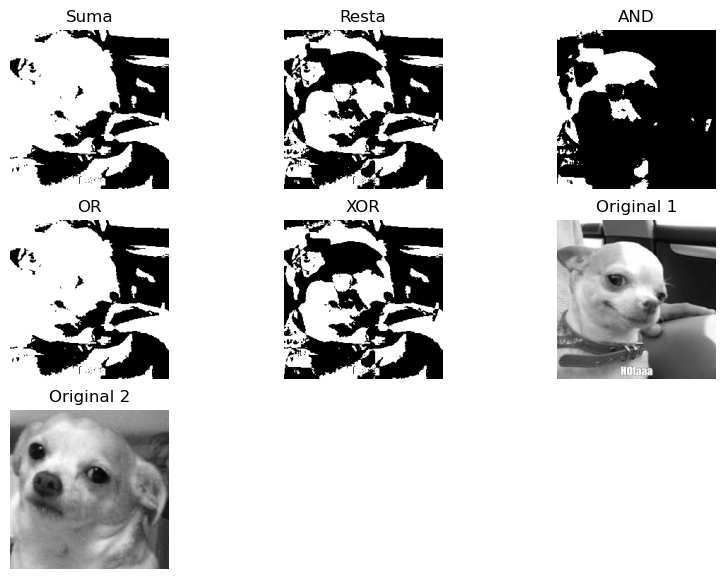

In [11]:
operaciones("entrada/img1ch.jpg","entrada/img2ch.jpg")

### Problema 4
Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openC y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

In [12]:
def deteccionBordes(imgEntrada):

# Descripcion: Esta funcion aplica las formas de deteccion de bordes: algoritmo Canny, operador Sobel y operador Laplaciano
# Entradas: string con el nombre de la imagen, o la ubicacion donde se encuentra (a nivel carpeta local)
# Salida: imagenes con las diferentes formas de detaccion de bordes

    #Convertir a escala de grises
    img= cv2.imread(imgEntrada, cv2.IMREAD_GRAYSCALE)

    #operador Sobel
    Xsobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    Ysobel =cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    magnitud= np.sqrt(Xsobel**2 + Ysobel**2)
    magnitud= np.uint8(magnitud)
    #algoritmo Canny
    canny= cv2.Canny(img, threshold1=120, threshold2=220)
    #operador laplaciano
    laplace = cv2.Laplacian(img, cv2.CV_64F)

    # figura general
    fig = plt.figure(figsize=(10, 7))
    #agrego imagenes
    fig.add_subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Original")
    #agrego imagenes
    fig.add_subplot(2, 3, 2)
    plt.imshow(cv2.convertScaleAbs(Xsobel), cmap='gray')
    plt.axis('off')
    plt.title("Xsobel")
    #agrego imagenes
    fig.add_subplot(2, 3, 3)
    plt.imshow(magnitud, cmap='gray')
    plt.axis('off')
    plt.title("sobelGradienteMagnitud")
    #agrego imagenes
    fig.add_subplot(2, 3, 4)
    plt.imshow(cv2.convertScaleAbs(Ysobel), cmap='gray')
    plt.axis('off')
    plt.title("Ysobel")
    #agrego imagenes
    fig.add_subplot(2, 3, 5)
    plt.imshow(canny, cmap='gray')
    plt.axis('off')
    plt.title("Canny")
    #agrego imagenes
    fig.add_subplot(2, 3, 6)
    plt.imshow(cv2.convertScaleAbs(laplace), cmap='gray')
    plt.axis('off')
    plt.title("laplace")

    #Resultados
    cv2.imwrite("problema4Resultado/xSobel.png", Xsobel)
    cv2.imwrite("problema4Resultado/ySobel.png", Ysobel)
    cv2.imwrite("problema4Resultado/gradienteSobel.png", magnitud)
    cv2.imwrite("problema4Resultado/canny.png", canny)
    cv2.imwrite("problema4Resultado/laplace.png", laplace)

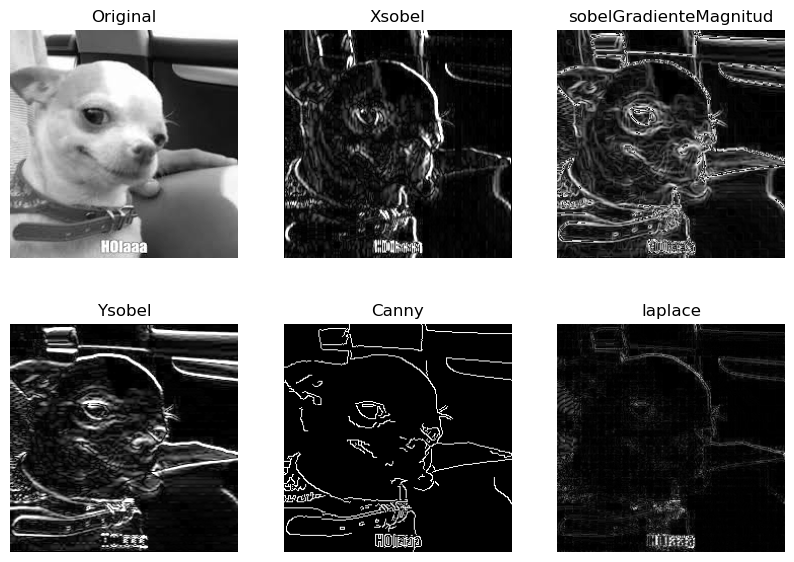

In [13]:
deteccionBordes("entrada/img1ch.jpg")

| Enfoque    | Ventajas                                                                                                                                                                            | Desventajas                                                                                                                                                                                       |
|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Sobel      | Ejecucion mas rapida sin tanto procesamiento previo, en el ejercicio se observa el  comportamiento por partes por lo que se puede realizar un mejor analisis del comportamiento     | Es sensible al ruido como se puede observar en las imagenes generadas, Pierde algunos detalles por las diferencias de tonalidades                                                                 |
| Canny      | Limpieza en la deteccion de bordes, Diferencia notable entre bordes, Maneja bien discontinuidades de intensidad                                                                     | Procesamiento previo alto por lo que puede ser un poco lento, si se tiene texturas finas o bordes complejos puede ser dificil que detecte bordes, por ejemplo el rostro del perro pierde detalles |
| Laplaciano | Detecta el cambio brusco por lo que el borde de la cabeza es facilmente diferenciable,al igual que el fondo de la imagen. Tambien las esquinas se encuentran facilmente detectables | Se pierde detalles, ya que detecta de mejor forma solo aquellos cambios bruscos por lo que en la imagen no se puede observar la cara del perro                                                    |

### Problema 5
Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que deberá realizar son las siguientes:
- Kernel Gaussiano de riodo.
- Kernel Box de ruido.
- Kernel de mediana para ruido.
- Kernel Sobel para detección de bornes (en X e Y).
- Kernel Lapaciano para detección de bordes.
- Kernel de realce (Sharpening).
- Kernel de relieve (Embossing)

In [37]:
def convolucion(imagOriginal, kernel, n):
    imagc = cv2.imread(imagOriginal, cv2.IMREAD_GRAYSCALE)
    if kernel=='gaussiano':
        result=cv2.GaussianBlur(imagc, (n,n), 0)
    elif kernel=='box':
        result=cv2.boxFilter(imagc, -1, (n, n))
    elif kernel=='mediana':
        result=cv2.medianBlur(imagc, n)
    elif kernel=='laplaciano':
        result=cv2.Laplacian(imagc, cv2.CV_64F)
    elif kernel=='realce':
        if n == 3:
            k = np.array([[0, -1, 0],
                                      [-1, 5, -1],
                                      [0, -1, 0]])
        elif n == 5:
            k = np.array([[-1, -1, -1, -1, -1],
                                        [-1, 2, 2, 2, -1],
                                        [-1, 2, 8, 2, -1],
                                        [-1, 2, 2, 2, -1],
                                        [-1, -1, -1, -1, -1]])
        elif n == 7:
            k = np.array([[-1, -1, -1, -1, -1, -1, -1],
                                        [-1, -1, -1, -1, -1, -1, -1],
                                        [-1, -1, 2, 2, 2, -1, -1],
                                        [-1, -1, 2, 8, 2, -1, -1],
                                        [-1, -1, 2, 2, 2, -1, -1],
                                        [-1, -1, -1, -1, -1, -1, -1],
                                        [-1, -1, -1, -1, -1, -1, -1]])
        result=cv2.filter2D(imagc, -1, k)
    elif kernel=='relieve':
        if n == 3:
            k = np.array([[-2, -1, 0],
                                     [-1, 1, 1],
                                     [0, 1, 2]])
        elif n == 5:
            k = np.array([[-1, -1, -1, -1, 0],
                                     [-1, -1, -1, 0, 1],
                                     [-1, -1, 0, 1, 1],
                                     [-1, 0, 1, 1, 1],
                                     [0, 1, 1, 1, 2]])
        elif n == 7:
            k = np.array([[-1, -1, -1, -1, -1, -1, -1],
                                     [-1, -1, -1, -1, -1, 0, 1],
                                     [-1, -1, -1, -1, 0, 1, 1],
                                     [-1, -1, -1, 0, 1, 1, 1],
                                     [-1, -1, 0, 1, 1, 1, 1],
                                     [-1, 0, 1, 1, 1, 1, 1],
                                     [0, 1, 1, 1, 1, 1, 2]])
        result=cv2.filter2D(imagc, -1, k)
    return result
        

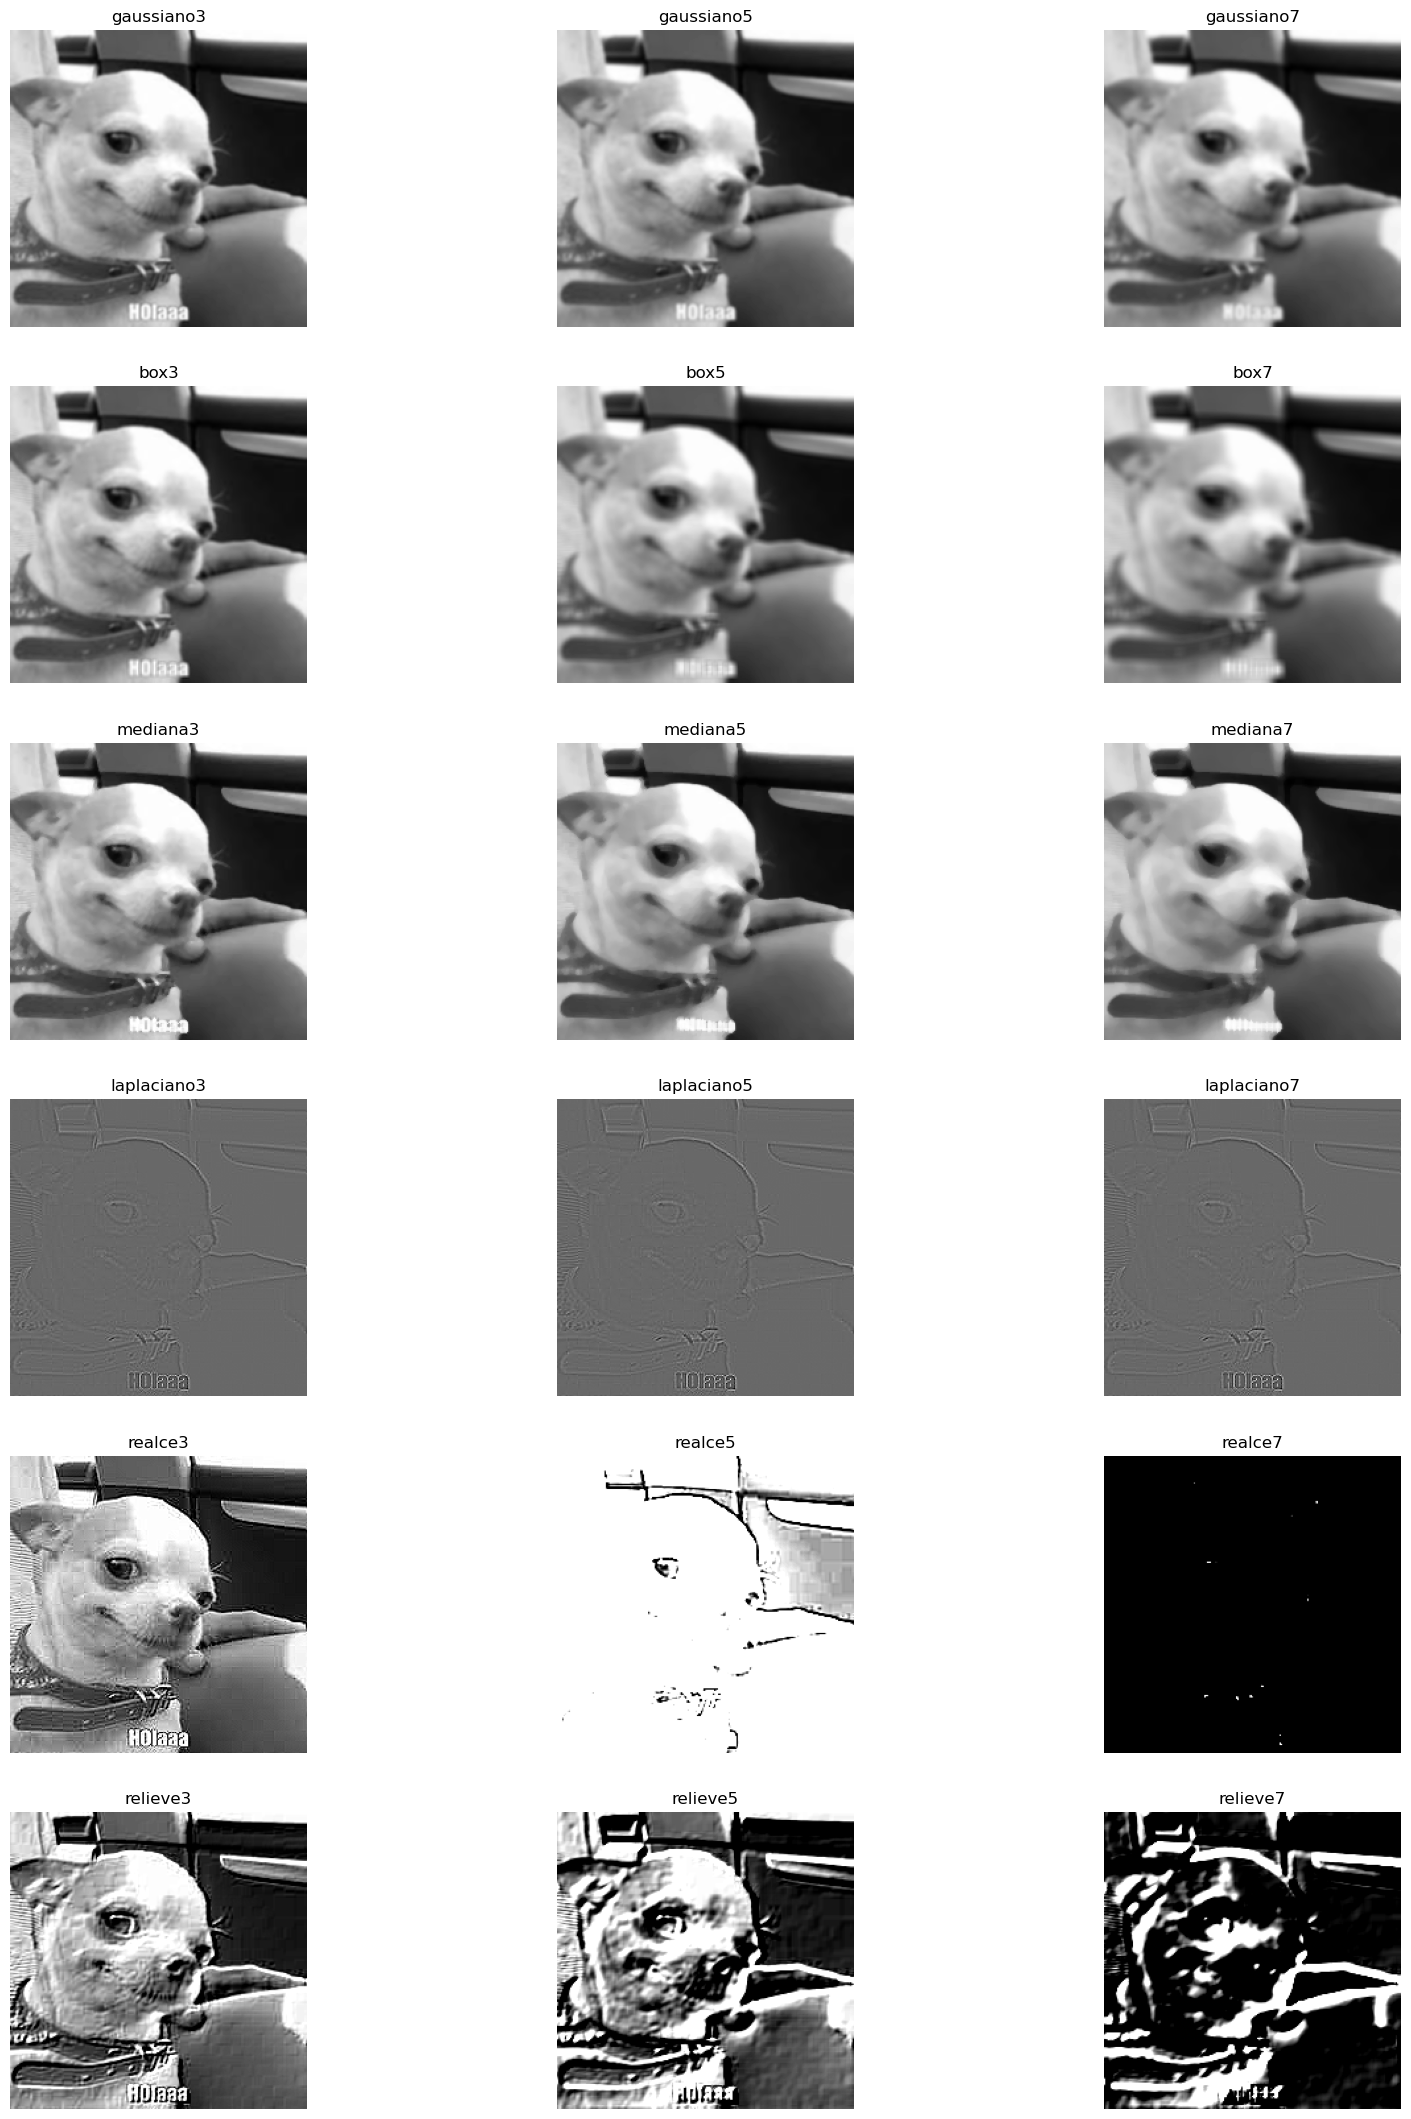

In [52]:
nombres=['gaussiano','box','mediana','laplaciano','realce','relieve']
size=[3,5,7]
i=1
imagen='entrada/img1ch.jpg'
# figura general
fig = plt.figure(figsize=(20, 27))
for nombre in nombres:
    for num in size:
        g=convolucion(imagen,nombre,num)
        #agrego imagenes
        fig.add_subplot(6, 3, i)
        plt.imshow(g, cmap='gray')
        plt.axis('off')
        plt.title(nombre+str(num))
        arr=["problema5Resultado/",nombre,str(num),".png"]
        dire="".join(arr)
        cv2.imwrite(dire, g)  
        i=i+1            

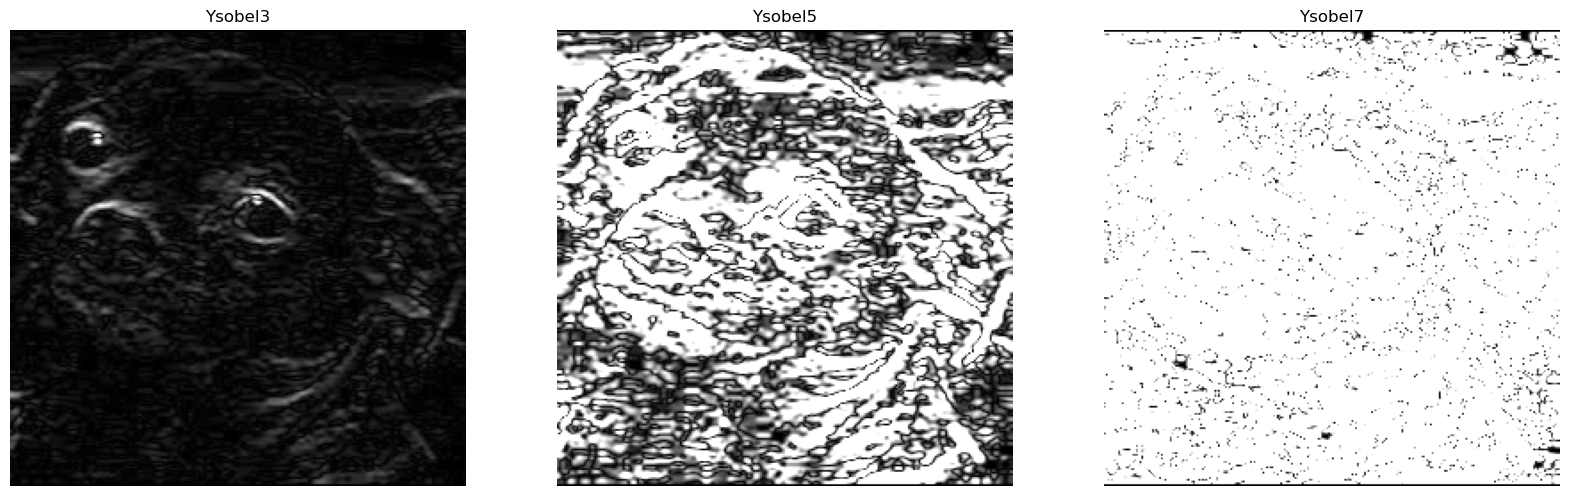

In [53]:
imagc = cv2.imread('entrada/img2ch.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(20, 27))
i=1
for num in size:
    Ysobel = cv2.Sobel(imagc, cv2.CV_64F, 0, 1, ksize=num)
    fig.add_subplot(2, 3, i)
    plt.imshow(cv2.convertScaleAbs(Ysobel), cmap='gray')
    plt.axis('off')
    nombre="".join(["Ysobel",str(num)])
    plt.title(nombre)
    arr=["problema5Resultado/",nombre,".png"]
    dire="".join(arr)
    cv2.imwrite(dire, Ysobel)   
    i=i+1

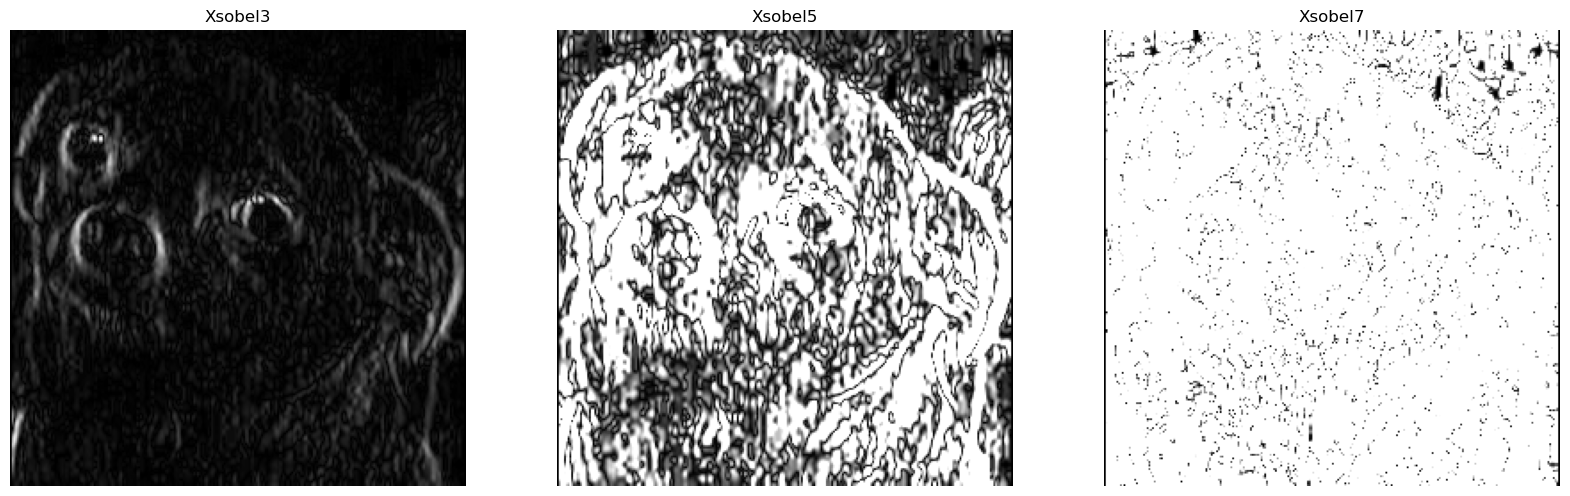

In [54]:
imagc = cv2.imread('entrada/img2ch.jpg', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(20, 27))
i=1
for num in size:
    Xsobel= cv2.Sobel(imagc, cv2.CV_64F, 1, 0, ksize=num)
    fig.add_subplot(2, 3, i)
    plt.imshow(cv2.convertScaleAbs(Xsobel), cmap='gray')
    plt.axis('off')
    nombre="".join(["Xsobel",str(num)])
    plt.title(nombre)
    arr=["problema5Resultado/",nombre,".png"]
    dire="".join(arr)
    cv2.imwrite(dire, Xsobel) 
    i=i+1